In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = {}

### Energy

Source: [EIA](https://www.eia.gov/totalenergy/data/browser/)  
Granularity: month

In [2]:
df = pd.read_csv('./datasets/Primary energy overview (monthly).csv')
df['date'] = df['YYYYMM'].astype(str)
df_date = df['date'].str.extract('(?P<year>\d\d\d\d)(?P<month>\d\d)', expand=True)
df['year'], df['month'] = df_date['year'], df_date['month']
df = df[['year', 'month', 'Value', 'Description']]
df = df[df['month'] != '13']
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df = df.set_index(['year', 'month'])

look_for = {
    'Total Fossil Fuels Production': 'production, fossil fuel',
    'Nuclear Electric Power Production': 'production, nuclear',
    'Total Renewable Energy Production': 'production, renewable',
    'Total Primary Energy Production': 'production, primary',
    
    'Total Fossil Fuels Consumption': 'consumption, fossil fuel',
    'Nuclear Electric Power Consumption': 'consumption, nuclear',
    'Total Renewable Energy Consumption': 'consumption, renewable',
    'Total Primary Energy Consumption': 'consumption, primary',
}

for description, indicator in look_for.items():
    current_df = df[df['Description'] == description]\
        .drop(columns=['Description'])\
        .rename(columns={'Value':indicator})
    
    data[indicator] = current_df.copy()

### GDP
Source: [Datahub](https://datahub.io/core/gdp-us) (from US Government’s Bureau of Economic Analysis)  
Granularity: quarter of a year

Gross Domestic Product (GDP) of the United States (US) both nominal and real on an annual and quarterly basis. Annual data is provided since 1930 and quarterly data since 1947. Both total GDP (levels) and annualized percentage change in GDP are provided. Both levels and changes are available both in current dollars (nominal GDP) and in chained 2009 dollars (real GDP). Data is sourced from US Government’s Bureau of Economic Analysis (BEA) and provided in standardized CSV.

In [3]:
df = pd.read_csv('./datasets/GDP (quarterly).csv')
df = df.set_index('date')['level-chained'].to_frame().reset_index()

df_date = pd.DataFrame(df['date'].str.split('-', 3).tolist(), columns = ['year','month', 'day'])
df['year'], df['month'] = df_date['year'], df_date['month']
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df = df.drop(columns='date').set_index(['year', 'month']).rename(columns={'level-chained': 'gdp chained'})
data['gdp chained'] = df
df

gdp chained
year month             
1947 4           1932.3
     7           1930.3
     10          1960.7
1948 1           1989.5
     4           2021.9
...                 ...
2016 4          16663.5
     7          16778.1
     10         16851.4
2017 1          16903.2
     4          17031.1

[281 rows x 1 columns]

### CO$_2$ emissions

https://www.eia.gov/totalenergy/data/browser/

In [4]:
indicator = 'co2'

df = pd.read_csv('./datasets/CO2 emissions by source (montlhy).csv')
df['date'] = df['YYYYMM'].astype(str)
df_date = df['date'].str.extract('(?P<year>\d\d\d\d)(?P<month>\d\d)', expand=True)
df['year'], df['month'] = df_date['year'], df_date['month']
df = df[['year', 'month', 'Value', 'Description']]
df = df[df['month'] != '13']
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df = df.set_index(['year', 'month'])

look_for = {
#     'Coal, Including Coal Coke Net Imports, CO2 Emissions',
#     'Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions',
#     'Aviation Gasoline CO2 Emissions',
#     'Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions',
#     'Hydrocarbon Gas Liquids CO2 Emissions',
#     'Jet Fuel CO2 Emissions',
#     'Kerosene CO2 Emissions',
#     'Lubricants CO2 Emissions',
#     'Motor Gasoline, Excluding Ethanol, CO2 Emissions',
#     'Petroleum Coke CO2 Emissions',
#     'Residual Fuel Oil CO2 Emissions',
#     'Other Petroleum Products CO2 Emissions',
#     'Petroleum, Excluding Biofuels, CO2 Emissions',
    'Total Energy CO2 Emissions': 'co2, total'
}

for description, indicator in look_for.items():
    current_df = df[df['Description'] == description]\
        .drop(columns=['Description'])\
        .rename(columns={'Value':indicator})
    
    data[indicator] = current_df.copy()

## Total dataframe

### Monthly

In [5]:
total_df = None
for indicator, df in data.items():
    if total_df is None:
        total_df = df.copy()
    else:
        total_df = total_df.join(df, rsuffix='_right')
total_df.to_csv('./datasets/US data - monthly.csv')

total_df

production, fossil fuel  production, nuclear  \
year month                                                 
1973 1                     4.932632             0.068103   
     2                     4.729582             0.064634   
     3                     4.946902             0.072494   
     4                     4.716271             0.064070   
     5                     4.956995             0.062111   
...                             ...                  ...   
2020 3                     6.799616             0.669091   
     4                     6.260001             0.618623   
     5                     5.862867             0.672653   
     6                     5.888229             0.702629   
     7                     6.300145             0.725425   

            production, renewable  production, primary  \
year month                                               
1973 1                   0.403981             5.404715   
     2                   0.360900             5.155115   
     3                   0.400161             5.419556   
     4                   0.380470             5.160812   
     5                   0.392141             5.411246   
...                           ...                  ...   
2020 3                   0.995023             8.463729   
     4                   0.919439             7.798062   
     5                   1.040212             7.575732   
     6                   1.060066             7.650925   
     7                   1.003547             8.029117   

            consumption, fossil fuel  consumption, nuclear  \
year month                                                   
1973 1                      6.747651              0.068103   
     2                      6.163095              0.064634   
     3                      6.044647              0.072494   
     4                      5.493184              0.064070   
     5                      5.613551              0.062111   
...                              ...                   ...   
2020 3                      6.197548              0.669091   
     4                      4.976704              0.618623   
     5                      5.132514              0.672653   
     6                      5.524553              0.702629   
     7                      6.370432              0.725425   

            consumption, renewable  consumption, primary  gdp chained  \
year month                                                              
1973 1                    0.403981              7.223873       5380.5   
     2                    0.360900              6.592366          NaN   
     3                    0.400161              6.521439          NaN   
     4                    0.380470              5.941729       5441.5   
     5                    0.392141              6.071940          NaN   
...                            ...                   ...          ...   
2020 3                    0.963830              7.843358          NaN   
     4                    0.910557              6.516843          NaN   
     5                    1.041498              6.859155          NaN   
     6                    1.053109              7.293597          NaN   
     7                    0.993159              8.105214          NaN   

            co2, total  
year month              
1973 1         454.300  
     2         415.351  
     3         407.758  
     4         368.216  
     5         376.081  
...                ...  
2020 3         385.390  
     4         305.491  
     5         318.940  
     6         348.909  
     7         406.367  

[571 rows x 10 columns]

### Quarterly

In [6]:
import numpy as np

final_df = []
tmp_df = pd.DataFrame()

for row in total_df.iterrows():
    gdp = row[1]['gdp chained'] # GDP value
    tmp_df = tmp_df.append(row[1]) # Add current row with all values to tmp_df

    # If the GDP is not NaN
    if not np.isnan(gdp):
        
        # Sum all the values (GDP will be just the last one since in sum NaN=0)
        df_summed = tmp_df.sum()
        
        # Name it to have index: (year, month)
        df_summed.name = row[0]
        
        # Append row to final dataframe
        final_df.append(df_summed.copy())
        tmp_df = pd.DataFrame()
        
final_df = pd.DataFrame(final_df)

In [7]:
# Set index: (year, month)
df = final_df.reset_index()
df_dates = pd.DataFrame(df['index'].values.tolist(), index=df.index)
df['year'], df['month'] = df_dates[0], df_dates[1]
df = df.set_index(['year', 'month']).drop(columns=['index'])
df.to_csv('./datasets/US data - quarterly.csv')
df

co2, total  consumption, fossil fuel  consumption, nuclear  \
year month                                                               
1973 1         454.300                  6.747651              0.068103   
     4        1191.325                 17.700926              0.201198   
     7        1105.705                 16.465586              0.211969   
     10       1132.106                 16.890961              0.252578   
1974 1        1267.861                 18.854998              0.261185   
...                ...                       ...                   ...   
2016 4        1226.615                 18.886686              2.034472   
     7        1274.282                 19.131206              2.134695   
     10       1294.103                 19.344535              2.067827   
2017 1        1369.789                 20.820758              2.195990   
     4        1215.585                 18.637153              1.939067   

            consumption, primary  consumption, renewable  gdp chained  \
year month                                                              
1973 1                  7.223873                0.403981       5380.5   
     4                 19.055534                1.141531       5441.5   
     7                 17.826532                1.136698       5411.9   
     10                18.140034                0.984216       5462.4   
1974 1                 20.309980                1.181978       5417.0   
...                          ...                     ...          ...   
2016 4                 23.643264                2.673412      16663.5   
     7                 23.952314                2.623535      16778.1   
     10                23.909773                2.440118      16851.4   
2017 1                 25.747186                2.671027      16903.2   
     4                 23.491092                2.865524      17031.1   

            production, fossil fuel  production, nuclear  production, primary  \
year month                                                                      
1973 1                     4.932632             0.068103             5.404715   
     4                    14.392755             0.201198            15.735483   
     7                    14.421367             0.211969            15.770034   
     10                   14.771822             0.252578            16.008617   
1974 1                    14.651743             0.261185            16.094904   
...                             ...                  ...                  ...   
2016 4                    15.932351             2.034472            20.663655   
     7                    16.251261             2.134695            21.015921   
     10                   16.642803             2.067827            21.155633   
2017 1                    16.625131             2.195990            21.523741   
     4                    16.319906             1.939067            21.156485   

            production, renewable  
year month                         
1973 1                   0.403981  
     4                   1.141531  
     7                   1.136698  
     10                  0.984216  
1974 1                   1.181978  
...                           ...  
2016 4                   2.696830  
     7                   2.629965  
     10                  2.445001  
2017 1                   2.702619  
     4                   2.897513  

[178 rows x 10 columns]

#### Plot energy production by source

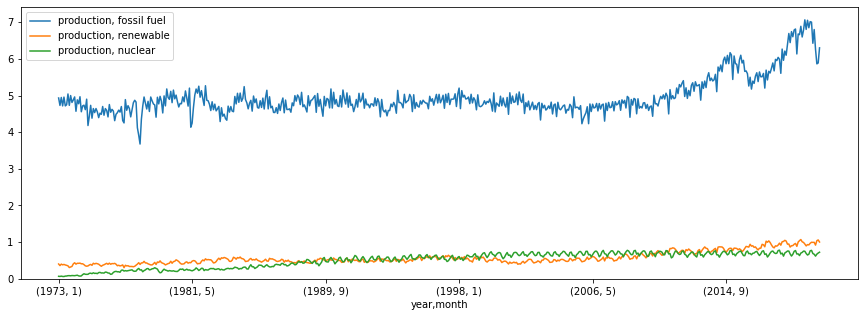

In [8]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
total_df.plot(y=['production, fossil fuel', 'production, renewable', 'production, nuclear'], ax=ax, ylim=0)
plt.show()

#### Plot energy consumption by source

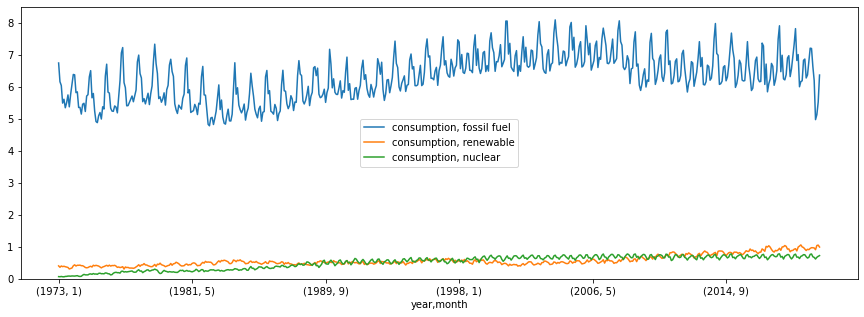

In [9]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
total_df.plot(y=['consumption, fossil fuel', 'consumption, renewable', 'consumption, nuclear'], ax=ax, ylim=0)
plt.show()